# Cancer Prediction

This notebook is a part of **Developer Student Clubs KGEC**.


## Module imports

In [1]:
import pandas as pd
import numpy as np

# Data visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Scikit-Learn
from sklearn.model_selection import train_test_split

# Evaluation metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

## Importing dataset

`Please upload the dataset in zip format direclty in google colab(not through google drive)`

In [2]:
!unzip /content/cancer_data.csv.zip

'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
DATASET_PATH = 'Datasets/cancer_data.csv'
cancer_data = pd.read_csv(DATASET_PATH)

## Exploratory Data Analysis

In [4]:
cancer_data.shape

(683, 11)

In [5]:
## Checking for null values
cancer_data.isnull().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [6]:
cancer_data.columns

Index(['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [7]:
cancer_data.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [8]:
cancer_data.tail()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
678,776715,3,1,1,1,3,2,1,1,1,2
679,841769,2,1,1,1,2,1,1,1,1,2
680,888820,5,10,10,3,7,3,8,10,2,4
681,897471,4,8,6,4,3,4,10,6,1,4
682,897471,4,8,8,5,4,5,10,4,1,4


In [9]:
# Get dtypes of the dataset
cancer_data.dtypes

Sample code number             int64
Clump Thickness                int64
Uniformity of Cell Size        int64
Uniformity of Cell Shape       int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Bland Chromatin                int64
Normal Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object

In [10]:
## Let's see what are the classes
cancer_data['Class'].unique()

array([2, 4], dtype=int64)

**2 : Non cancerous**
**4 : Cancerous**

We are mapping `2` with **0** (non cancerous) and `4` with **1** (cancerous)

In [11]:
cancer_data['Class'] = cancer_data['Class'].map({2:0,4:1})

In [12]:
class_names = ['non-cancerous','cancerous']

In [13]:
def count_of_categories(category_name):
    col = [column for column in cancer_data.columns]
    try:
        sns.countplot(x = cancer_data[category_name])
        plt.xticks(rotation=360)
        plt.show()
    except:
        print(f"""Please Enter an Existing Category Name: Please choose from below: \n
{col}""")

print("Function Initialized Successfully")
# Note: You can call this function anytime to get a count of the any of the existing columns

Function Initialized Successfully


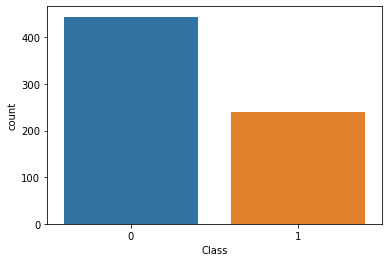

In [14]:
# Class Category Count
count_of_categories("Class")

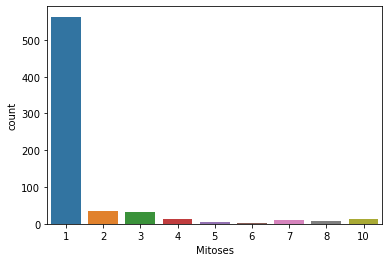

In [15]:
# Mitoses Category Count
count_of_categories("Mitoses")

These is an imbalance dataset

In [16]:
## Dropping the sample code number
cancer_data.drop('Sample code number', axis=1, inplace=True)

## Splitting the dataset into Train and test set

In [17]:
x_train, x_test, y_train, y_test = train_test_split(cancer_data.drop('Class',axis=1),cancer_data['Class'],test_size=0.2,random_state=42)

In [18]:
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [19]:
print('Shape of x train : ', x_train.shape)
print('Shape of x test : ', x_test.shape)
print('Shape of y train : ', y_train.shape)
print('Shape of y test : ', y_test.shape)

Shape of x train :  (546, 9)
Shape of x test :  (137, 9)
Shape of y train :  (546,)
Shape of y test :  (137,)


## Models

In [20]:
from sklearn.metrics import f1_score


def metrics(y_true,y_pred):
  print('f1 score :',f1_score(y_true,y_pred))
  print()
  print('accuracy :',accuracy_score(y_true,y_pred))
  print()
  print('Classification Report--')
  print(classification_report(y_true,y_pred,target_names=class_names))
  print()
  print('Confussion matrix--')
  print(confusion_matrix(y_true,y_pred))



### 1. Naive Bias

In [21]:
from sklearn.naive_bayes import GaussianNB
np.random.seed(42)

# Fir the Model
naive_bias_clf = GaussianNB().fit(x_train, y_train)

# Make a prediction
y_preds_naive_bias = naive_bias_clf.predict(x_test)

# Evaluate the model on the training and test data
naive_bias_clf.score(x_train, y_train), naive_bias_clf.score(x_test, y_test)

(0.9615384615384616, 0.9562043795620438)

In [22]:
metrics(y_test, y_preds_naive_bias)

f1 score : 0.9482758620689655

accuracy : 0.9562043795620438

Classification Report--
               precision    recall  f1-score   support

non-cancerous       0.96      0.96      0.96        79
    cancerous       0.95      0.95      0.95        58

     accuracy                           0.96       137
    macro avg       0.96      0.96      0.96       137
 weighted avg       0.96      0.96      0.96       137


Confussion matrix--
[[76  3]
 [ 3 55]]


### 2. Ridge classifier

In [23]:
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
rc_clf = RidgeClassifier()
rc_clf.fit(x_train,y_train)
r2_score(y_test,rc_clf.predict(x_test))

0.7309035355739851

In [24]:
param_grid_rc = { 
    'alpha' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
}

CV_rc = GridSearchCV(estimator=rc_clf, param_grid=param_grid_rc, cv= 5);
CV_rc.fit(x_test, y_test);
print(CV_rc.best_params_)

{'alpha': 0.1}


In [25]:
y_preds_rc = CV_rc.predict(x_test)
metrics(y_test,y_preds_rc)

f1 score : 0.9369369369369369

accuracy : 0.948905109489051

Classification Report--
               precision    recall  f1-score   support

non-cancerous       0.93      0.99      0.96        79
    cancerous       0.98      0.90      0.94        58

     accuracy                           0.95       137
    macro avg       0.95      0.94      0.95       137
 weighted avg       0.95      0.95      0.95       137


Confussion matrix--
[[78  1]
 [ 6 52]]


### 3. Random Forest Classifier

In [26]:
# Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
random_forest_clf = RandomForestClassifier(n_jobs=-1, max_features= 'sqrt' , n_estimators=200, oob_score = True)

# Fit the model to the training data
random_forest_clf.fit(x_train, y_train)

# Make a prediction
y_preds_random_forest_clf = random_forest_clf.predict(x_test);

In [27]:
# Evaluate the model on the training and test data
random_forest_clf.score(x_train, y_train), random_forest_clf.score(x_test, y_test)

(1.0, 0.9562043795620438)

In [28]:
param_grid = { 
    'n_estimators': [200, 700],
    'max_features': ['sqrt', 'log2']
}

CV_rfc = GridSearchCV(estimator=random_forest_clf, param_grid=param_grid, cv= 5);
CV_rfc.fit(x_test, y_test);
print(CV_rfc.best_params_)

{'max_features': 'sqrt', 'n_estimators': 200}


In [29]:
y_preds_random_forest_clf = CV_rfc.predict(x_test);

In [30]:
# Get the metrices
metrics(y_test, y_preds_random_forest_clf)

f1 score : 1.0

accuracy : 1.0

Classification Report--
               precision    recall  f1-score   support

non-cancerous       1.00      1.00      1.00        79
    cancerous       1.00      1.00      1.00        58

     accuracy                           1.00       137
    macro avg       1.00      1.00      1.00       137
 weighted avg       1.00      1.00      1.00       137


Confussion matrix--
[[79  0]
 [ 0 58]]


### 4. Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [32]:
log_reg.fit(x_train,y_train)

LogisticRegression()

In [33]:
#Evaluating with default parameters
from sklearn.metrics import r2_score
r2_score(y_test,log_reg.predict(x_test))

0.8206023570493234

In [34]:
#finding the best parameters for accuracy
param_grid_lr = { 
    'solver' : ['newton-cg', 'lbfgs', 'liblinear'],
    'penalty' : ['l2'],
    'C' : [100, 10, 1.0, 0.1, 0.01]
}

CV_lr = GridSearchCV(estimator=log_reg, param_grid=param_grid_lr, cv= 5);
CV_lr.fit(x_test, y_test);
print(CV_lr.best_params_)

{'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}


In [35]:
y_preds_log_reg = CV_lr.predict(x_test);

In [36]:
metrics(y_test,y_preds_log_reg)

f1 score : 0.9827586206896551

accuracy : 0.9854014598540146

Classification Report--
               precision    recall  f1-score   support

non-cancerous       0.99      0.99      0.99        79
    cancerous       0.98      0.98      0.98        58

     accuracy                           0.99       137
    macro avg       0.99      0.99      0.99       137
 weighted avg       0.99      0.99      0.99       137


Confussion matrix--
[[78  1]
 [ 1 57]]


### 5. K-Nearest Neighbour

### 6. Feed-forward-neural-network

### Visualization of results

In [37]:
def cmatrix(y_test,y_pred):
  cm=confusion_matrix(y_test,y_pred)
  group_names=['True Neg','False Pos','False Neg','True Pos']
  group_counts = ["{0:0.0f}".format(value) for value in
                  cm.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in
                      cm.flatten()/np.sum(cm)]
  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  categories = ['Zero', 'One']
  accuracy  = np.trace(cm) / float(np.sum(cm))
  precision = cm[1,1] / sum(cm[:,1])
  recall    = cm[1,1] / sum(cm[1,:])
  f1_score  = 2*precision*recall / (precision + recall)
  stats_text = "\n\n Accuracy={:0.3f}\n Precision={:0.3f}\n Recall={:0.3f}\n F1 Score={:0.3f}".format(accuracy,precision,recall,f1_score)
  sns.heatmap(cm, xticklabels=categories,yticklabels=categories,annot=labels, fmt='', cmap='coolwarm')
  plt.xlabel('Predicted label'+stats_text)
  plt.ylabel('True label')
  plt.show()

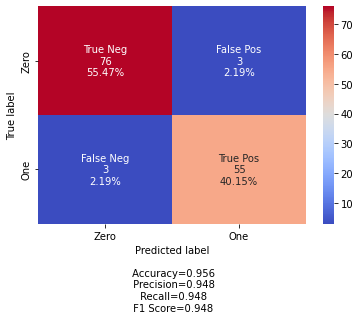

In [38]:
cmatrix(y_test,y_preds_naive_bias)